<h1>Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης</h1>
<h2>Εργαστηριακή Άσκηση Εαρινό Εξάμηνο 2023-2024</h2>
<h3>Στεργιόπουλος Γεώργιος<br>1083861<br>Τμήμα: ΗΜΤΥ</h3>

<b><h1>Ερώτημα 3 - Clustering</h1></b>

<h2>Συλλογή Δεδομένων</h2>
<i>Αν καταθέσω 1 notebook, δεν χρειάζεται αυτό</i>

In [23]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

# testers=['S006']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe():
    df=pd.DataFrame()
    for i in testers:
        tester_df = pd.read_sql_query(dataOfTester(i), conn)
        tester_df['tester'] = i
        if(i=='S015' or i=='S021'):
            tester_df=tester_df.drop(columns=['index'])
        if(i=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
        df=pd.concat([df,tester_df],ignore_index=True)
    return df

df=pd.DataFrame()
df=createDataframe()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
 8   tester     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 443.7+ MB


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,tester
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,S006
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,S006
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,S006
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,S006
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,S006


In [18]:
df.tail()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,tester
6461323,2019-01-12 00:59:56.940,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3,S029
6461324,2019-01-12 00:59:56.960,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3,S029
6461325,2019-01-12 00:59:56.980,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3,S029
6461326,2019-01-12 00:59:57.000,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3,S029
6461327,2019-01-12 00:59:57.020,-1.015381,-0.030762,-0.218262,-1.000244,-0.305420,0.076904,3,S029


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   label      int64 
 2   tester     object
dtypes: int64(1), object(2)
memory usage: 147.9+ MB
S006
S008
S009
S010
S012
S013
S014
S015
S016
S017
S018
S019
S020
S021
S022
S023
S024
S025
S026
S027
S028
S029


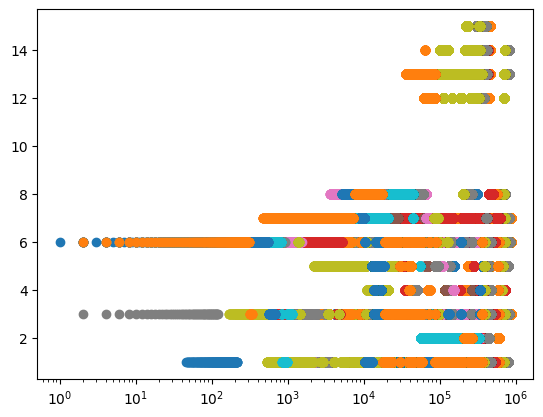

In [25]:
df_nosens=df.drop(columns=['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z'])
df_nosens.info()
from matplotlib import pyplot as plt

df_nosens['timestamp']=pd.to_datetime(df_nosens['timestamp'])
interval=pd.Timedelta('0.010s')
df_nosens['sample']=(df_nosens['timestamp']-df_nosens['timestamp'].iloc[0])//interval

df_nosens['label'] = df_nosens['label'].replace({130: 12, 140: 15})
df_nosens.head()

for i in testers:
    print(i)
    plt.scatter(df_nosens[df_nosens['tester']==i]['sample'],df_nosens[df_nosens['tester']==i]['label'])

    


plt.xscale('log')
# plt.scatter(df_nosens['sample'],df_nosens['label'])
plt.show()

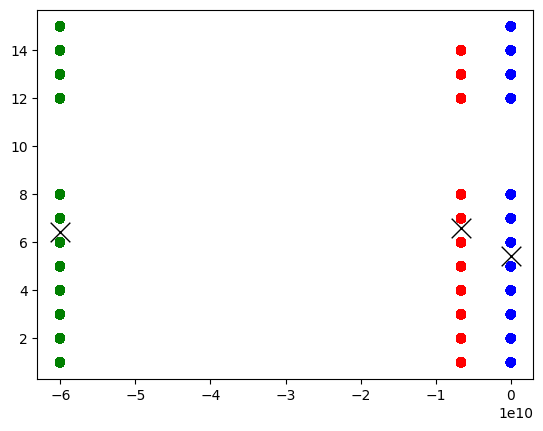

In [27]:
from sklearn.cluster import KMeans

X=df_nosens[['sample','label']]
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

labels=kmeans.labels_
colors=['red','green','blue']
df_nosens['Graph_color']=[colors[label] for label in labels]
plt.scatter(df_nosens['sample'],df_nosens['label'],c=df_nosens['Graph_color'])
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=1, color='black')

plt.show()

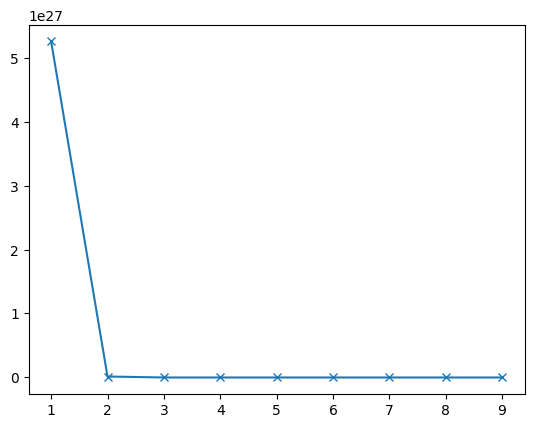

In [30]:
distortion=[]
from sklearn.cluster import KMeans
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)

plt.plot(range(1,10),distortion,marker='x')
plt.show()